### Naive Bayes

- **Naive Bayes is a classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms.** 

<img src='images/bayes.png' width='60%' height='60%' />


- **This classifier is  called 'Naïve' because It's assume that features are conditionally independent, given the class.**


- **In other words: It assume that, for all instances of a given class, the features have little/no correlation with each other.** 


<img src='images/nb4.PNG' width='90%' height='90%'/>

<img src='images/nb1.PNG' width='50%' height='50%'/>

<img src='images/b1.png' width='40%' height='40%'/>

### So now numerator is equivalent to

<img src='images/nb2.PNG'/>

### Therefore we can say

<img src='images/nb3.PNG'/>

#### This means that under the above independence assumptions, the conditional distribution over the class variable  C is:

<img src='images/nb7.PNG' />

where Z=P(X)

<img src='images/nb9.PNG'/>

<img src='images/nb8.PNG'/>

source:https://en.wikipedia.org/wiki/Naive_Bayes_classifier

<img src='images/nb_types.PNG' width='60%' height='60%'/>

### Multinomial Naive Bayes

- The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).


- The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### What is a Bag-of-Words?

- way of extracting features from text for train a model 

- The representation of text in a format of a matrix where each row is an observation and each column is a unique word.

- The value of each element of in a matrix is either a binary value that indicate the presence of each word or an integer that indicate how many times that word appears.

- or A bag-of-words is a representation of text that describes the occurrence of words with in a document.

###  CountVectorizer

- A way that can produce a bag-of-words representation from a collection of text documents.

- A collection of documents is called a corpus.

- Tokenization is the process of splitting documents or a string into tokens(words).

- The CountVectorizer class tokenizes using a regular expression that splits strings on whitespace and extracts sequences of characters that are two or more in length.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vect = CountVectorizer()

messages = ["Hey hey hey lets go get lunch today..!",
            "Did you go home?..",
            "Hey!!! I need a favor"]

#using fit method ,CountVectorizer() will learn what tokens are being used in our messages
vect.fit(messages)

dtm = vect.transform(messages)

dtm.toarray()

array([[0, 0, 1, 1, 3, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [2]:
df = pd.DataFrame(dtm.toarray(),columns = vect.get_feature_names())
print (df)

   did  favor  get  go  hey  home  lets  lunch  need  today  you
0    0      0    1   1    3     0     1      1     0      1    0
1    1      0    0   1    0     1     0      0     0      0    1
2    0      1    0   0    1     0     0      0     1      0    0


### TF-IDF(Term frequency-inverse document frequency)

- It's a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

- Term frequency-inverse document frequency is a statistic that reflects how important a word is to a specific document relative to all of the words in a collection of documents (the corpus). 

<img src = 'images/tfidf.png' width='60%' height='60%' />

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('people_wiki/people_wiki.csv',usecols=['name','text'])

In [5]:
df[df.name.str.contains('Barack Obama')]

,name,text
35811,Barack Obama,barack hussein obama ii brk husen bm born augu...


In [6]:
df.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [7]:
df.shape

(42786, 2)

**a vector of word counts for the Wikipedia text on Barack Obama. then plot the ten most frequently occuring words.** 

In [8]:
name = 'Barack Obama'
#Extract text for a particular person
data=df[df.name==name]

In [9]:
t=data.text[35811]

In [11]:
#t

In [13]:
count_vectorizer = CountVectorizer()
#Apply this vectorizer to text to get a sparse matrix of counts
count_matrix = count_vectorizer.fit_transform([t])
#Get the names of the features
features = count_vectorizer.get_feature_names()
#Create a series from the sparse matrix
d = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

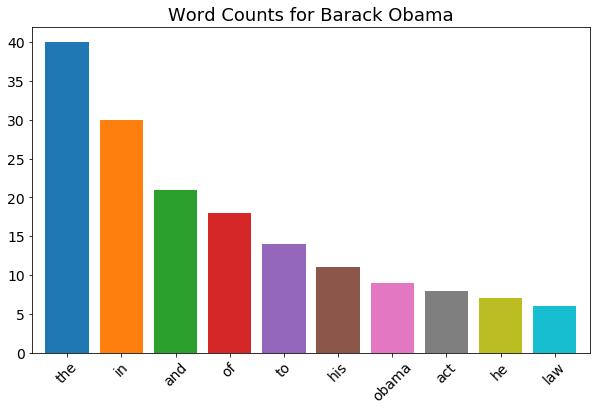

In [15]:
ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14,rot=45,
            title='Word Counts for Barack Obama')
ax.title.set_size(18)

### TF-IDF

In [16]:
df.shape

(42786, 2)

In [17]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer()
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
#Get the names of the features
features = tfidf_vectorizer.get_feature_names()
#get the row that contains relevant vector


In [18]:
tfidf_matrix.shape

(42786, 437503)

In [19]:
row=tfidf_matrix[35811].toarray()

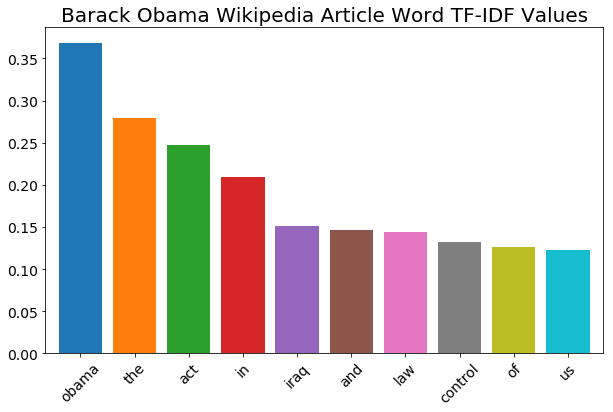

In [20]:
d = pd.Series(row.flatten(), index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', title='Barack Obama Wikipedia Article Word TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45 )
ax.title.set_size(20)

### Using K-Nearest Neighbors to Identify Similar Articles

In [21]:
nbrs = NearestNeighbors(n_neighbors=10).fit(tfidf_matrix)

def get_closest_neighs(name):
    row=df[df.name==name].index[0]
    
    distances, indices = nbrs.kneighbors(tfidf_matrix.getrow(row))
    names_similar = pd.Series(indices.flatten()).map(df.reset_index()['name'])
    result = pd.DataFrame({'distance':distances.flatten(), 'name':names_similar})
    return result

In [22]:
print (get_closest_neighs('Barack Obama'))

   distance                     name
0  0.000000             Barack Obama
1  1.064722                Joe Biden
2  1.115578           Samantha Power
3  1.138436  Eric Stern (politician)
4  1.148145           George W. Bush
5  1.148840              John McCain
6  1.156913             Henry Waxman
7  1.161320              Eric Holder
8  1.161438  Barry Sullivan (lawyer)
9  1.161834             Bill Clinton


In [24]:
df[df.name.str.contains('Rahul')]

,name,text
4353,Rahul Gandhi,rahul gandhi about this sound pronunciation ra...
7913,Rahul Peter Das,rahul peter das born 7 july 1954 in haan north...
34741,Rahul Chandran,rahul chandran born 1976 is a policy analyst w...


In [25]:
print (get_closest_neighs('Rahul Gandhi'))

   distance                         name
0  0.000000                 Rahul Gandhi
1  1.119252                Shanti Gandhi
2  1.184238                  G. K. Vasan
3  1.203391                 Navin Chawla
4  1.215589              S. S. Ramasubbu
5  1.223875               Rasheed Masood
6  1.232569               Shashi Tharoor
7  1.241350  Uppuluri Mallikarjuna Sarma
8  1.244521                 Ian Micallef
9  1.245662             Vijay K. Nambiar


In [21]:
df.shape

(42786, 2)